In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sklearn

In [5]:
%matplotlib inline

In [6]:
students = pd.read_csv('student-mat.csv', sep=';')

In [7]:
students.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [8]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [9]:
students.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

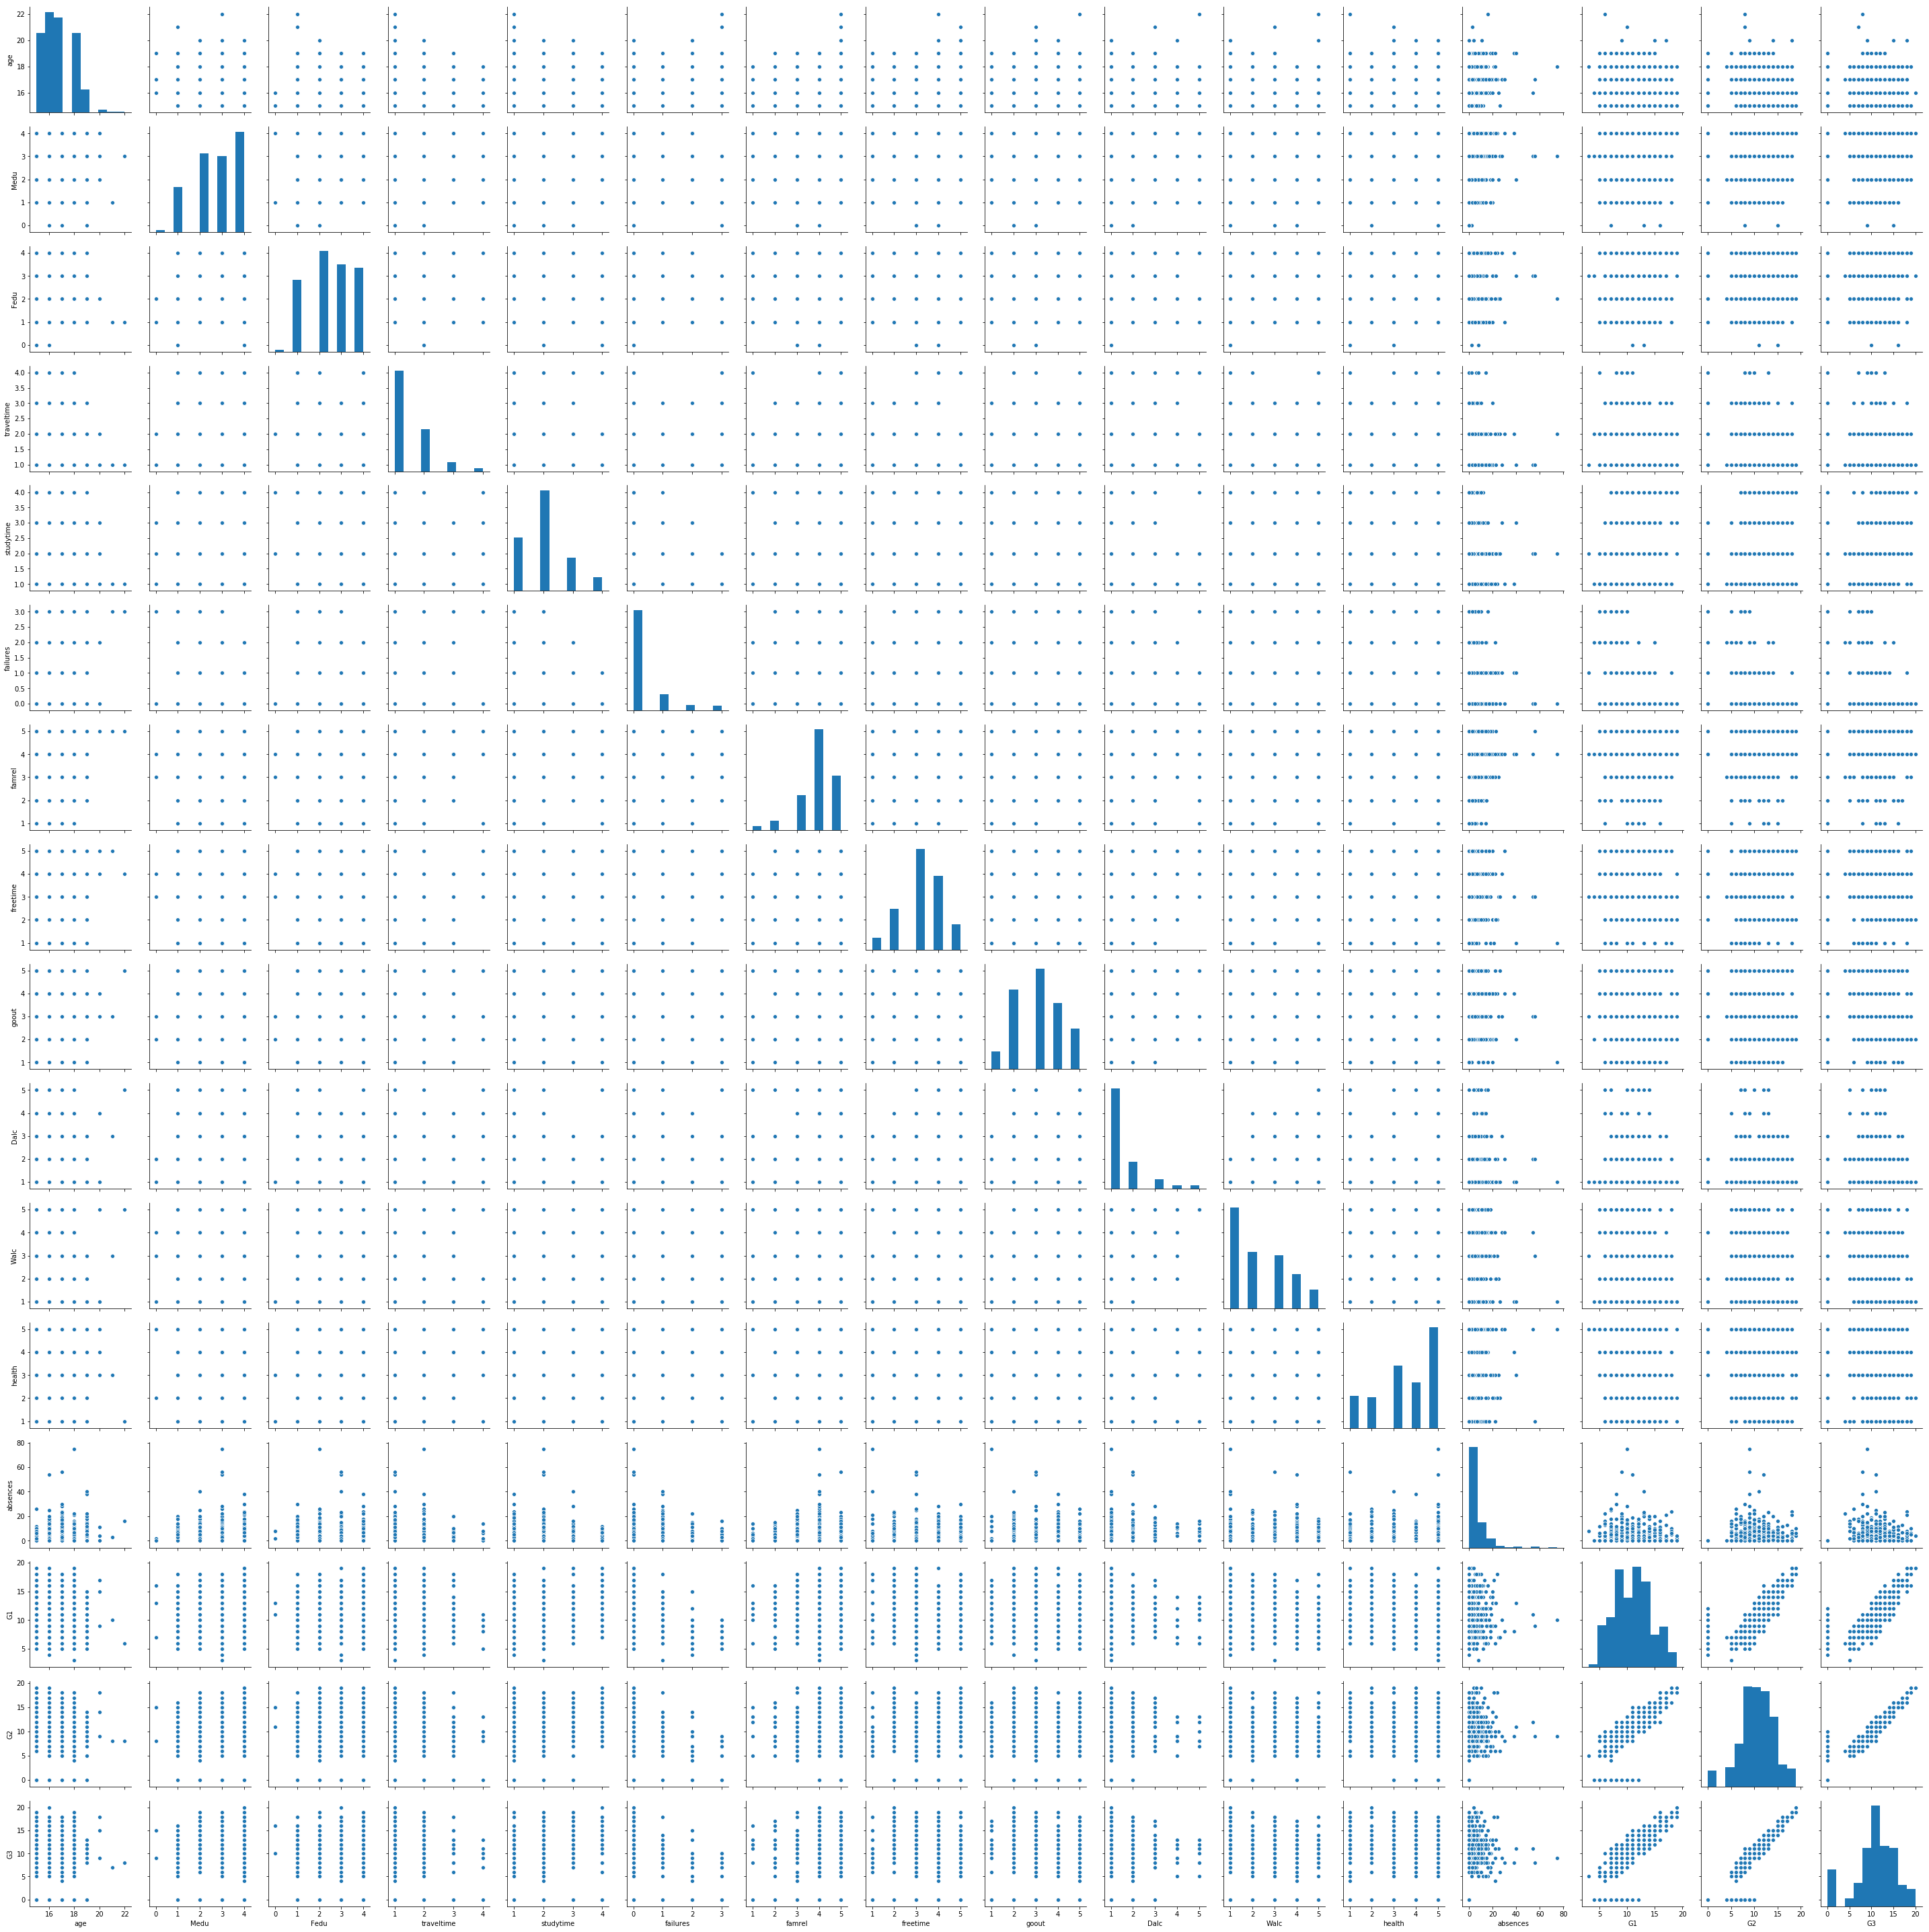

In [10]:
sns.pairplot(students)

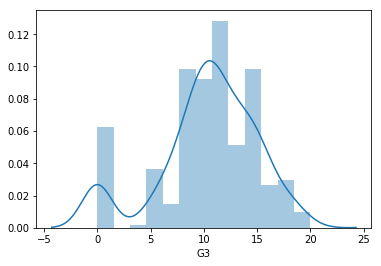

In [11]:
sns.distplot(students['G3'])

In [12]:
students.corr()

age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   
absences    0.175230  0.100285  0.024473   -0.012944  -0.062700  0.063726   
G1         -0.064081  0.205341  0.190270   -0.093040   0.160612 -0.354718   
G2         -0.143474  0.215527  0.164893   -0.153198   0.135880 -0.355896   
G3         -0.161579  0.217147  0.152457   -0.117142   0.097820 -0.360415   

              famrel  freetime     goout      Dalc      Walc    health  \
age         0.053940  0.016434  0.126964  0.131125  0.117276 -0.062187   
Medu       -0.003914  0.030891  0.064094  0.019834 -0.047123 -0.046878   
Fedu       -0.001370 -0.012846  0.043105  0.002386 -0.012631  0.014742   
traveltime -0.016808 -0.017025  0.028540  0.138325  0.134116  0.007501   
studytime   0.039731 -0.143198 -0.063904 -0.196019 -0.253785 -0.075616   
failures   -0.044337  0.091987  0.124561  0.136047  0.141962  0.065827   
famrel      1.000000  0.150701  0.064568 -0.077594 -0.113397  0.094056   
freetime    0.150701  1.000000  0.285019  0.209001  0.147822  0.075733   
goout       0.064568  0.285019  1.000000  0.266994  0.420386 -0.009577   
Dalc       -0.077594  0.209001  0.266994  1.000000  0.647544  0.077180   
Walc       -0.113397  0.147822  0.420386  0.647544  1.000000  0.092476   
health      0.094056  0.075733 -0.009577  0.077180  0.092476  1.000000   
absences   -0.044354 -0.058078  0.044302  0.111908  0.136291 -0.029937   
G1          0.022168  0.012613 -0.149104 -0.094159 -0.126179 -0.073172   
G2         -0.018281 -0.013777 -0.162250 -0.064120 -0.084927 -0.097720   
G3          0.051363  0.011307 -0.132791 -0.054660 -0.051939 -0.061335   

            absences        G1        G2        G3  
age         0.175230 -0.064081 -0.143474 -0.161579  
Medu        0.100285  0.205341  0.215527  0.217147  
Fedu        0.024473  0.190270  0.164893  0.152457  
traveltime -0.012944 -0.093040 -0.153198 -0.117142  
studytime  -0.062700  0.160612  0.135880  0.097820  
failures    0.063726 -0.354718 -0.355896 -0.360415  
famrel     -0.044354  0.022168 -0.018281  0.051363  
freetime   -0.058078  0.012613 -0.013777  0.011307  
goout       0.044302 -0.149104 -0.162250 -0.132791  
Dalc        0.111908 -0.094159 -0.064120 -0.054660  
Walc        0.136291 -0.126179 -0.084927 -0.051939  
health     -0.029937 -0.073172 -0.097720 -0.061335  
absences    1.000000 -0.031003 -0.031777  0.034247  
G1         -0.031003  1.000000  0.852118  0.801468  
G2         -0.031777  0.852118  1.000000  0.904868  
G3          0.034247  0.801468  0.904868  1.000000

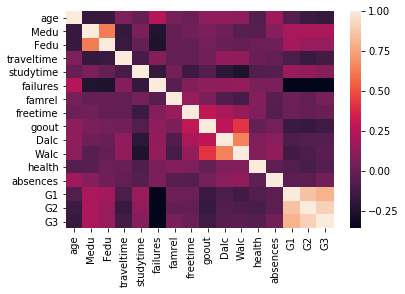

In [13]:
sns.heatmap(students.corr())

In [14]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [15]:
X = students[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']]

In [16]:
y = students['G3']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print(model.intercept_)

0.9419494321332191


In [23]:
model.coef_

array([-0.29312169,  0.082746  , -0.15320253,  0.06416232, -0.11650429,
       -0.28729233,  0.35075358,  0.06985357,  0.04735657, -0.16602413,
        0.15231143,  0.10955796,  0.04649207,  0.17604577,  0.95853473])

In [24]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coeff'])

In [25]:
cdf

Coeff
age        -0.293122
Medu        0.082746
Fedu       -0.153203
traveltime  0.064162
studytime  -0.116504
failures   -0.287292
famrel      0.350754
freetime    0.069854
goout       0.047357
Dalc       -0.166024
Walc        0.152311
health      0.109558
absences    0.046492
G1          0.176046
G2          0.958535

In [26]:
# PREDICTIONS #

In [27]:
predictions = model.predict(X_test)

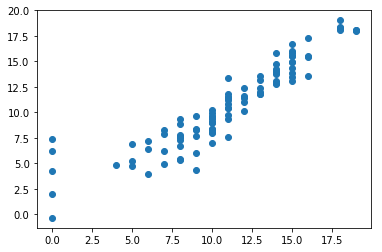

In [28]:
plt.scatter(y_test, predictions)

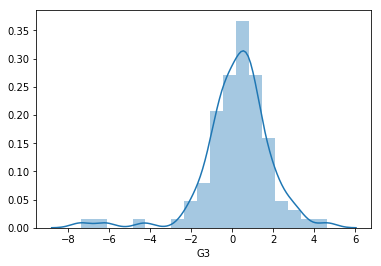

In [29]:
sns.distplot((y_test-predictions))

In [30]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y_test, predictions)

1.1700635479579464

In [32]:
metrics.mean_squared_error(y_test, predictions)

2.792184288382294

In [33]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.6709830305488724

In [34]:
model.score(X,y)

0.8359812497611063

In [35]:
metrics.r2_score(y_test, predictions)

0.8465693465512001

In [36]:
students2 = pd.read_csv('student-mat.csv', sep=';')

In [37]:
students2 = students2.drop(['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'age', 'Medu', 'Fedu', 'failures'], axis=1)

In [38]:
students2.head()

G1  G2  G3
0   5   6   6
1   5   5   6
2   7   8  10
3  15  14  15
4   6  10  10

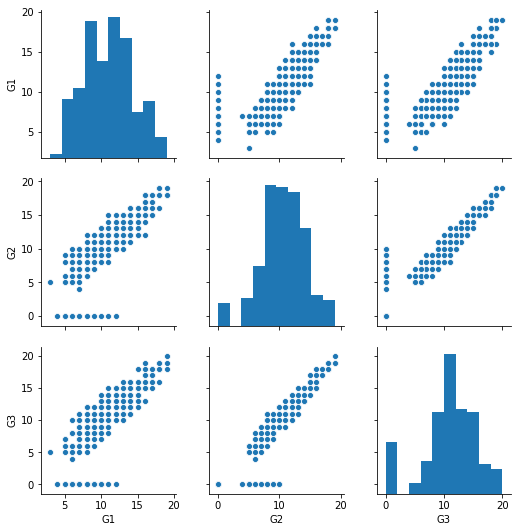

In [39]:
sns.pairplot(students2)

In [40]:
students2.columns

Index(['G1', 'G2', 'G3'], dtype='object')

In [41]:
X2 = students2[['G1', 'G2']]

In [42]:
y2 = students2['G3']

In [43]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=101)

In [44]:
model2 = LinearRegression()

In [45]:
model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
predictions2 = model2.predict(X2_test)

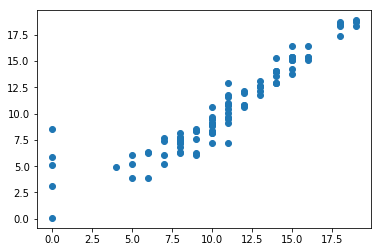

In [47]:
plt.scatter(y2_test, predictions2)

In [48]:
metrics.r2_score(y2_test, predictions2)

0.857018032980484

In [49]:
# DECISION TREES #

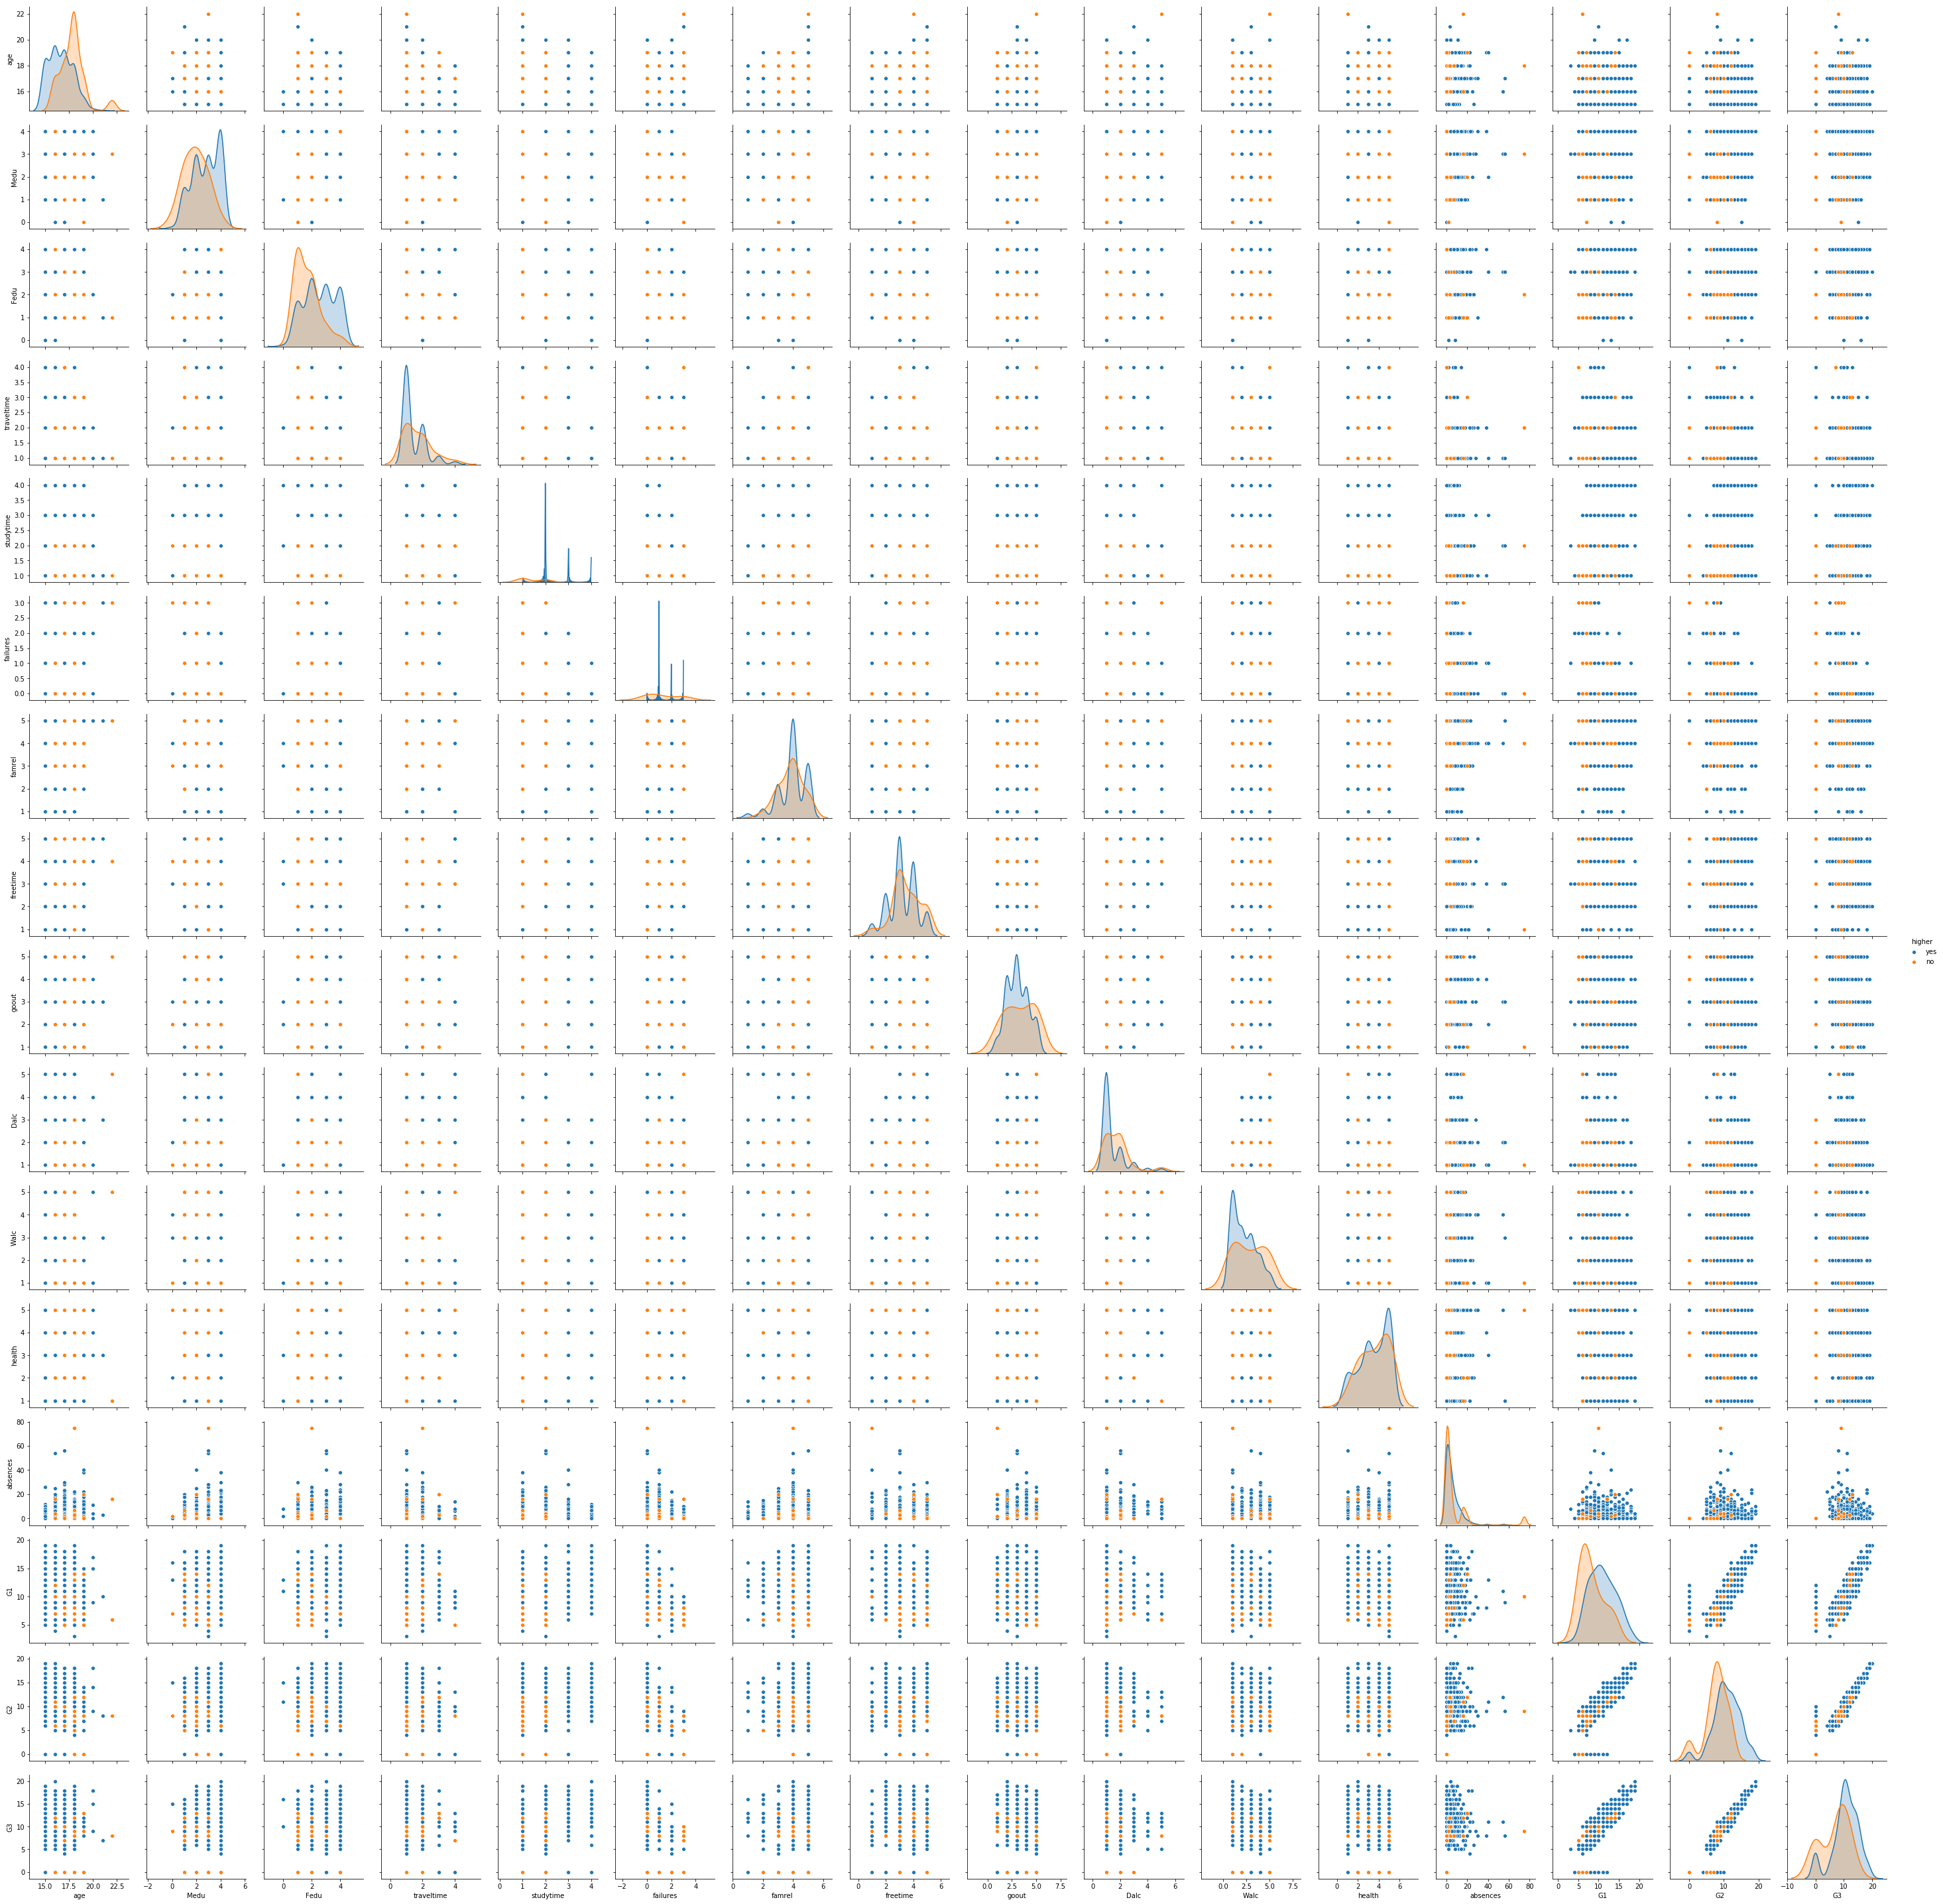

In [50]:
sns.pairplot(students, hue='higher')

In [51]:
X3 = students[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

In [52]:
y3 = students['higher']

In [53]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=101)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtree = DecisionTreeClassifier()

In [56]:
dtree.fit(X3_train, y3_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
predictions3 = dtree.predict(X3_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(confusion_matrix(y3_test, predictions3))
print('\n')
print(classification_report(y3_test, predictions3))

[[ 1  5]
 [ 8 85]]


              precision    recall  f1-score   support

          no       0.11      0.17      0.13         6
         yes       0.94      0.91      0.93        93

   micro avg       0.87      0.87      0.87        99
   macro avg       0.53      0.54      0.53        99
weighted avg       0.89      0.87      0.88        99



In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators=200)

In [62]:
rfc.fit(X3_train, y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
rfc_pred = rfc.predict(X3_test)

In [64]:
print(confusion_matrix(y3_test, rfc_pred))
print('\n')
print(classification_report(y3_test, rfc_pred))

[[ 0  6]
 [ 0 93]]


              precision    recall  f1-score   support

          no       0.00      0.00      0.00         6
         yes       0.94      1.00      0.97        93

   micro avg       0.94      0.94      0.94        99
   macro avg       0.47      0.50      0.48        99
weighted avg       0.88      0.94      0.91        99



E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
students['higher'].value_counts()

yes    375
no      20
Name: higher, dtype: int64

In [66]:
students['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

In [67]:
X4 = students[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

In [68]:
y4 = students['activities']

In [69]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=101)

In [70]:
dtree2 = DecisionTreeClassifier()

In [71]:
dtree2.fit(X4_train, y4_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
predictions4 = dtree2.predict(X4_test)

In [73]:
print(confusion_matrix(y4_test, predictions4))
print('\n')
print(classification_report(y4_test, predictions4))

[[32 23]
 [23 21]]


              precision    recall  f1-score   support

          no       0.58      0.58      0.58        55
         yes       0.48      0.48      0.48        44

   micro avg       0.54      0.54      0.54        99
   macro avg       0.53      0.53      0.53        99
weighted avg       0.54      0.54      0.54        99



In [74]:
rfc2 = RandomForestClassifier(n_estimators=3000)

In [75]:
rfc2.fit(X4_train, y4_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
rfc2_pred = rfc2.predict(X4_test)

In [77]:
print(confusion_matrix(y4_test, rfc2_pred))
print('\n')
print(classification_report(y4_test, rfc2_pred))

[[26 29]
 [16 28]]


              precision    recall  f1-score   support

          no       0.62      0.47      0.54        55
         yes       0.49      0.64      0.55        44

   micro avg       0.55      0.55      0.55        99
   macro avg       0.56      0.55      0.55        99
weighted avg       0.56      0.55      0.54        99



In [78]:
isPassed = pd.read_csv('student-mat.csv', sep=';')

In [79]:
isPassed.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [80]:
isPassed['isPassed'] = isPassed['G3']

In [81]:
isPassed.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    freetime goout  Dalc  Walc  health absences  G1  G2  G3 isPassed  
0   ...           3     4     1     1       3        6   5   6   6        6  
1   ...           3     3     1     1       3        4   5   5   6        6  
2   ...           3     2     2     3       3       10   7   8  10       10  
3   ...           2     2     1     1       5        2  15  14  15       15  
4   ...           3     2     1     2       5        4   6  10  10       10  

[5 rows x 34 columns]

In [82]:
isPassed['isPassed'] = isPassed['isPassed']>9

In [83]:
isPassed.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    freetime goout  Dalc  Walc  health absences  G1  G2  G3 isPassed  
0   ...           3     4     1     1       3        6   5   6   6    False  
1   ...           3     3     1     1       3        4   5   5   6    False  
2   ...           3     2     2     3       3       10   7   8  10     True  
3   ...           2     2     1     1       5        2  15  14  15     True  
4   ...           3     2     1     2       5        4   6  10  10     True  

[5 rows x 34 columns]

E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


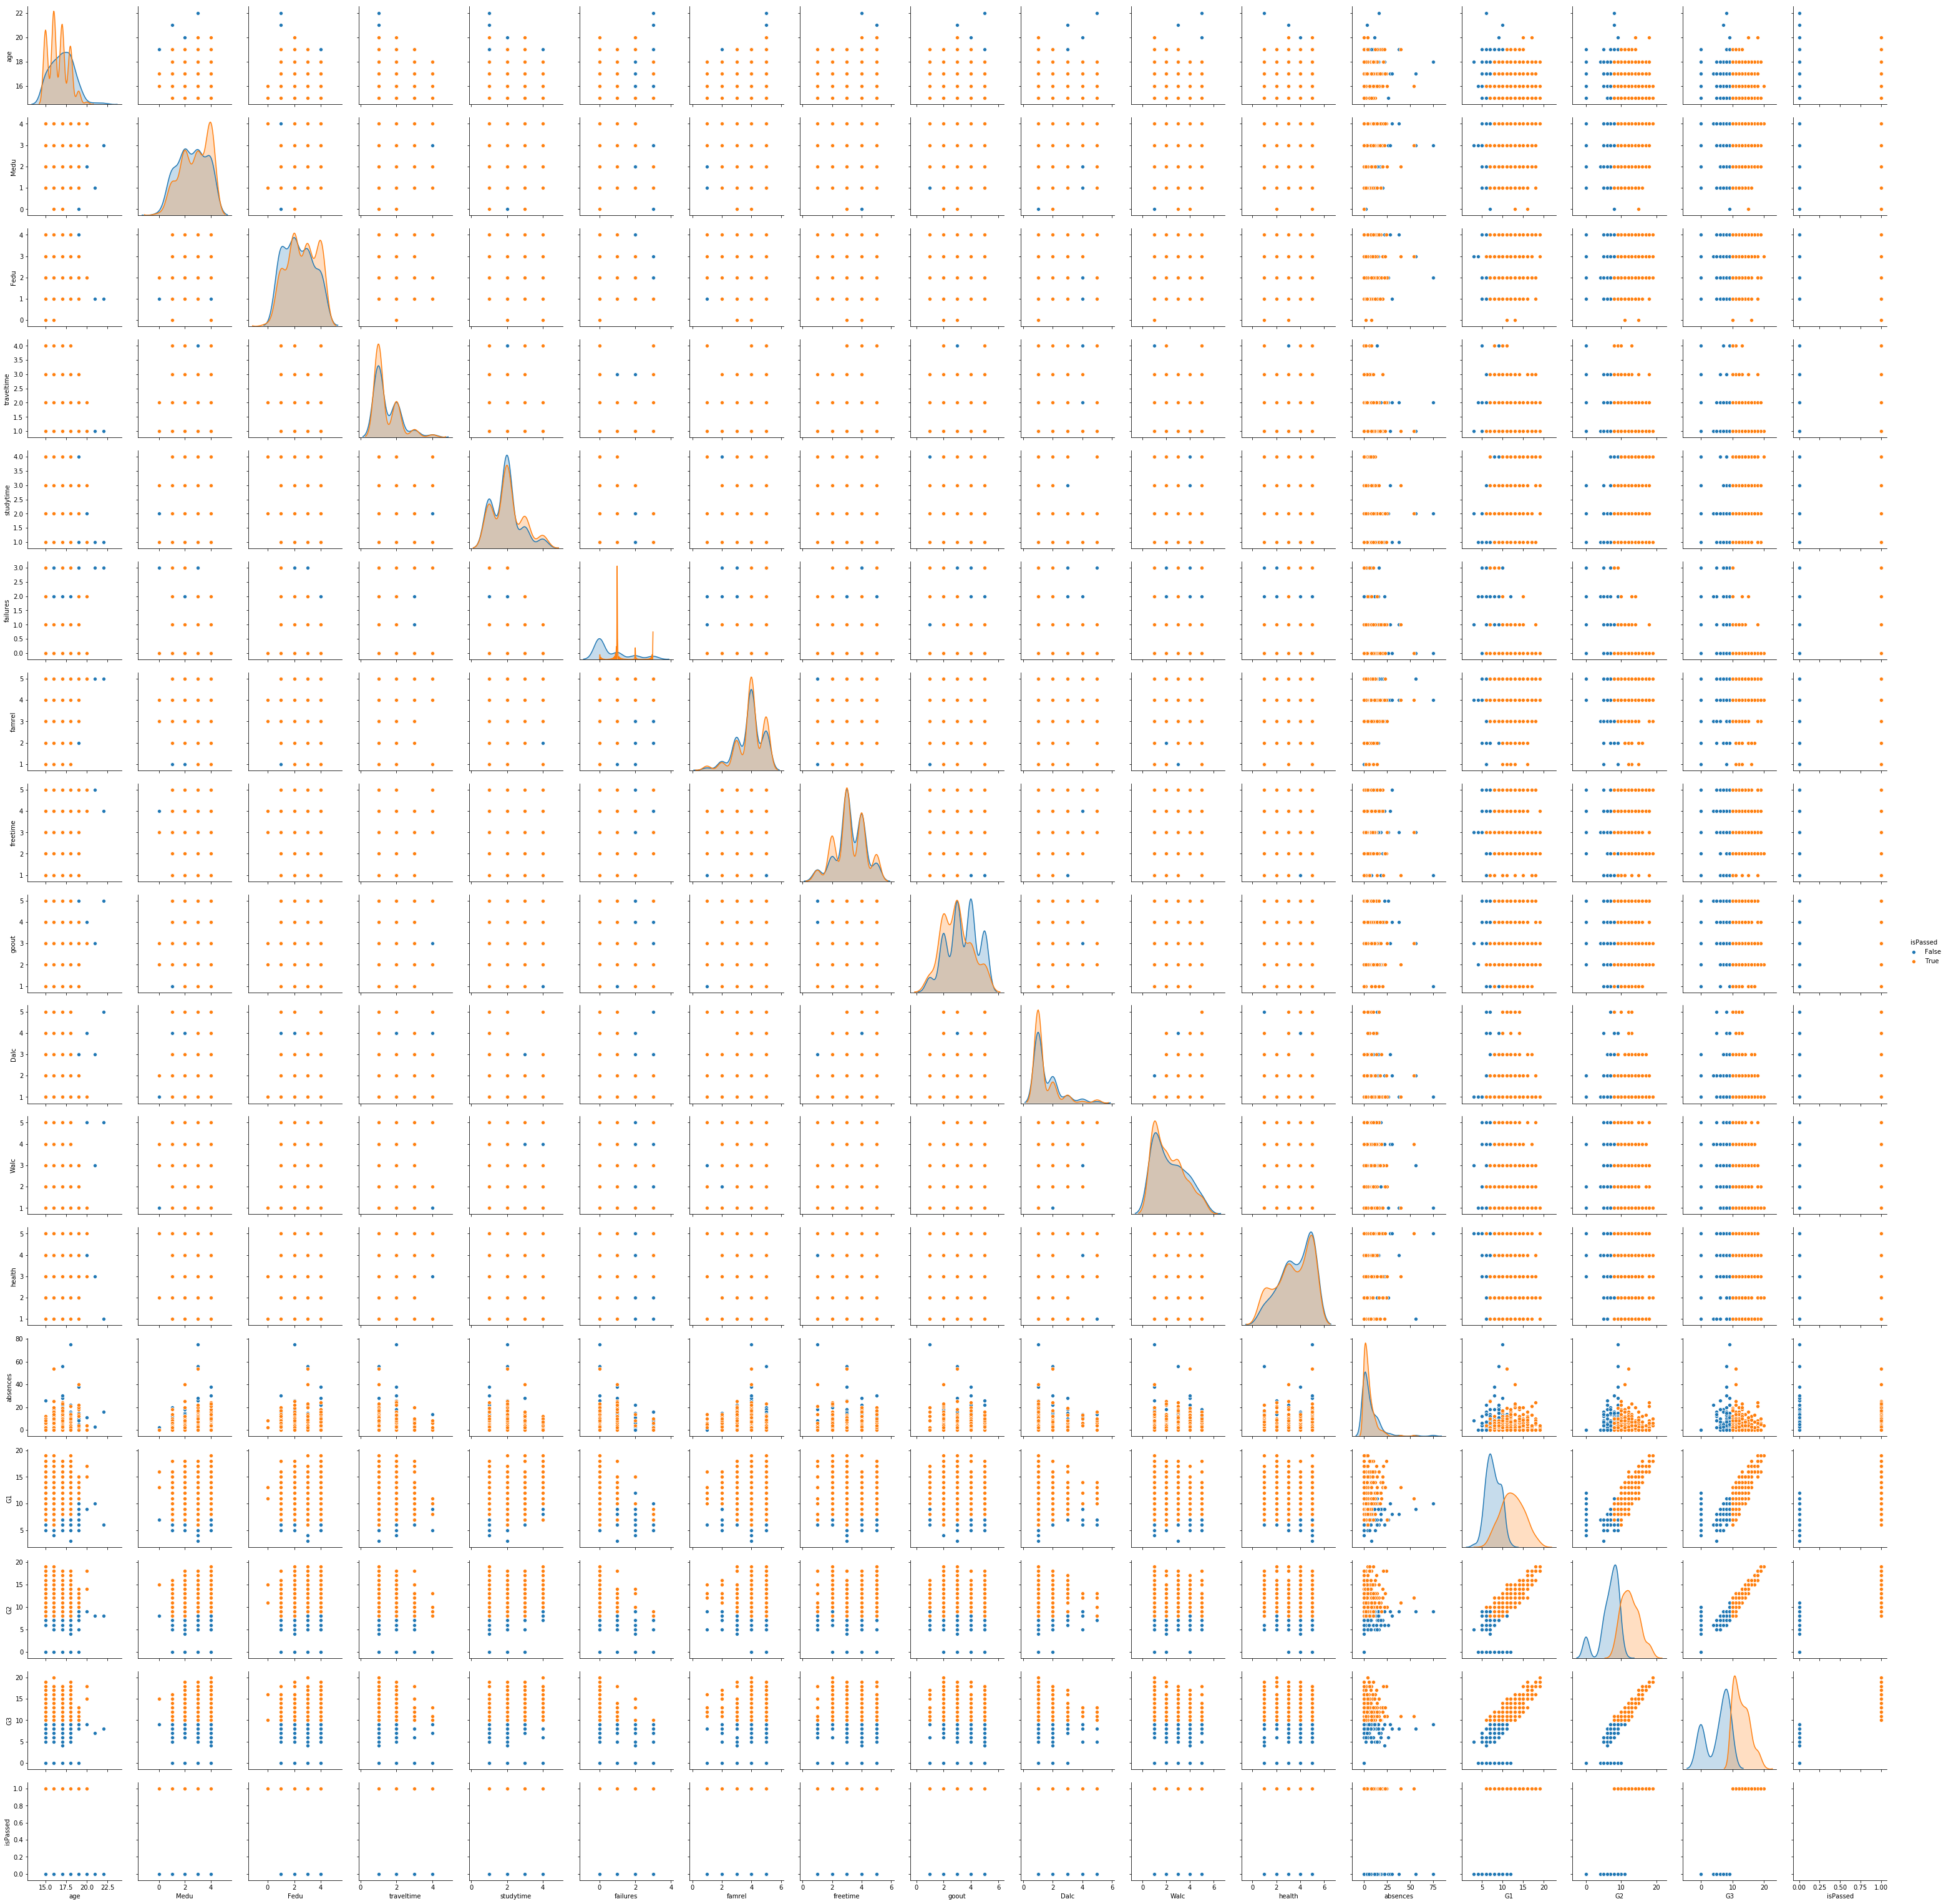

In [84]:
sns.pairplot(isPassed, hue='isPassed')

In [85]:
isPassed.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'isPassed'],
      dtype='object')

In [86]:
X5 = isPassed[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']]

In [87]:
y5 = isPassed['isPassed']

In [88]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.25, random_state=101)

In [89]:
dtree_isPassed = DecisionTreeClassifier()

In [90]:
dtree_isPassed.fit(X5_train, y5_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
predictions5 = dtree_isPassed.predict(X5_test)

In [92]:
print(confusion_matrix(y5_test, predictions5))
print('\n')
print(classification_report(y5_test, predictions5))

[[26  6]
 [ 8 59]]


              precision    recall  f1-score   support

       False       0.76      0.81      0.79        32
        True       0.91      0.88      0.89        67

   micro avg       0.86      0.86      0.86        99
   macro avg       0.84      0.85      0.84        99
weighted avg       0.86      0.86      0.86        99



In [93]:
rfc_isPassed = RandomForestClassifier(n_estimators=800)

In [94]:
rfc_isPassed.fit(X5_train, y5_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
rfc_isPassed = rfc_isPassed.predict(X5_test)

In [96]:
print(confusion_matrix(y5_test, rfc_isPassed))
print('\n')
print(classification_report(y5_test, rfc_isPassed))

[[31  1]
 [ 5 62]]


              precision    recall  f1-score   support

       False       0.86      0.97      0.91        32
        True       0.98      0.93      0.95        67

   micro avg       0.94      0.94      0.94        99
   macro avg       0.92      0.95      0.93        99
weighted avg       0.94      0.94      0.94        99



In [97]:
dtree_isPassed.feature_importances_

array([0.04991884, 0.00762973, 0.01355963, 0.00425279, 0.00473712,
       0.        , 0.02678512, 0.03728899, 0.02713365, 0.        ,
       0.04754346, 0.01016972, 0.04134477, 0.04003801, 0.68959816])

In [98]:
X5.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [99]:
isPassed['isPassed'].value_counts()

True     265
False    130
Name: isPassed, dtype: int64